In [1]:
import qiskit as qk

/Users/kevin.krsulichibm.com/q/qiskit-terra/qiskit/__init__.py:78: DeprecationWarning: Using Qiskit with Python 3.5 is deprecated as of the 0.12.0 release. Support for running Qiskit with Python 3.5 will be removed at the Python 3.5 EoL on 09/13/2020.
  "Python 3.5 EoL on 09/13/2020.", DeprecationWarning)


In [2]:
from qiskit.circuit import ReglessQubit, ReglessClbit

In [3]:
qargs = [ReglessQubit() for _ in range(5)]
cargs = [ReglessClbit() for _ in range(1)]

In [4]:
qargs

[ReglessQubit(0x12ada9278),
 ReglessQubit(0x12ada91d0),
 ReglessQubit(0x12ada99b0),
 ReglessQubit(0x12ada94e0),
 ReglessQubit(0x12ada93c8)]

In [5]:
cargs

[ReglessClbit(0x12ada9550)]

In [6]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [7]:
qr = QuantumRegister(bits=qargs)
cr = ClassicalRegister(bits=cargs)

In [8]:
qr

QuantumRegister(5, 'q0')

In [9]:
cr

ClassicalRegister(1, 'c0')

In [10]:
qr[0]

ReglessQubit(0x12ada9278)

In [11]:
cr[0]

ReglessClbit(0x12ada9550)

In [12]:
qc = qk.QuantumCircuit(qr, cr)

In [13]:
qc.qubits

[ReglessQubit(0x12ada9278),
 ReglessQubit(0x12ada91d0),
 ReglessQubit(0x12ada99b0),
 ReglessQubit(0x12ada94e0),
 ReglessQubit(0x12ada93c8)]

In [14]:
qc.clbits

[ReglessClbit(0x12ada9550)]

In [15]:
qc.qregs

{QuantumRegister(5, 'q0')}

In [16]:
qc.cregs

{ClassicalRegister(1, 'c0')}

In [17]:
qc.h(qr[0])

In [18]:
qc.h(0)

In [19]:
qc = qk.QuantumCircuit(5,3)

In [20]:
qc.qubits

[ReglessQubit(0x12adbe5f8),
 ReglessQubit(0x12adbeac8),
 ReglessQubit(0x12adbe908),
 ReglessQubit(0x12adbe160),
 ReglessQubit(0x12adbee80)]

In [21]:
qc.clbits

[ReglessClbit(0x12adbe278),
 ReglessClbit(0x12adbea58),
 ReglessClbit(0x10a02b5f8)]

In [22]:
qc.qregs

set()

In [23]:
qc.cregs

set()

In [24]:
qc.h(0)

In [25]:
qc.h(qc.qubits[0])

In [26]:
print(qc)

                               ┌───┐┌───┐
ReglessQubit(0x12adbe5f8)_: |0>┤ H ├┤ H ├
                               └───┘└───┘
ReglessQubit(0x12adbeac8)_: |0>──────────
                                         
ReglessQubit(0x12adbe908)_: |0>──────────
                                         
ReglessQubit(0x12adbe160)_: |0>──────────
                                         
ReglessQubit(0x12adbee80)_: |0>──────────
                                         
 ReglessClbit(0x12adbe278)_: 0 ══════════
                                         
 ReglessClbit(0x12adbea58)_: 0 ══════════
                                         
 ReglessClbit(0x10a02b5f8)_: 0 ══════════
                                         


In [27]:
dag = qk.converters.circuit_to_dag(qc)

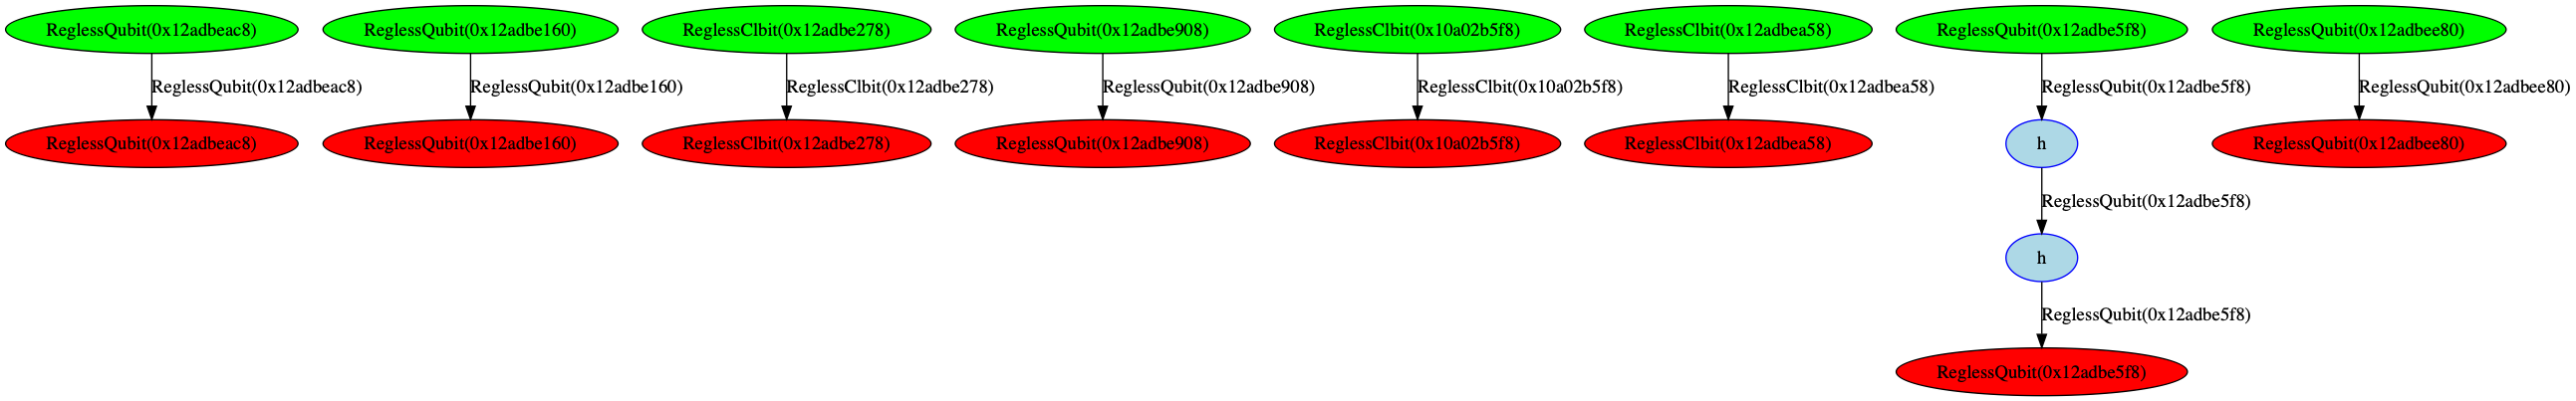

In [28]:
dag.draw()

In [29]:
list(dag.layers())

[{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x12af20a90>,
  'partition': [[ReglessQubit(0x12adbe5f8)]]},
 {'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x12af20b70>,
  'partition': [[ReglessQubit(0x12adbe5f8)]]}]

In [30]:
qc.mark_registers((0,2,4), 'foo')

QuantumRegister(3, 'foo')

In [31]:
qc.qregs

{QuantumRegister(3, 'foo')}

In [32]:
list(qc.qregs)[0][:]

[ReglessQubit(0x12adbe5f8),
 ReglessQubit(0x12adbe908),
 ReglessQubit(0x12adbee80)]

In [33]:
qc.mark_registers([qc.qubits[1], qc.qubits[3]], name='bar')

QuantumRegister(2, 'bar')

In [34]:
qc.qregs

{QuantumRegister(2, 'bar'), QuantumRegister(3, 'foo')}

In [35]:
h_broad = qk.QuantumCircuit(5)
h_broad.h(h_broad.qubits)
print(h_broad)

                               ┌───┐
ReglessQubit(0x129140b00)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x129140b38)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x129140b70)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x129140ba8)_: |0>┤ H ├
                               ├───┤
ReglessQubit(0x129140be0)_: |0>┤ H ├
                               └───┘


In [36]:
cx_tile = qk.QuantumCircuit(5)
for i in range(4):
    cx_tile.cx(i, i+1)
print(cx_tile)

                                                   
ReglessQubit(0x129145390)_: |0>──■─────────────────
                               ┌─┴─┐               
ReglessQubit(0x1291453c8)_: |0>┤ X ├──■────────────
                               └───┘┌─┴─┐          
ReglessQubit(0x129145400)_: |0>─────┤ X ├──■───────
                                    └───┘┌─┴─┐     
ReglessQubit(0x129145438)_: |0>──────────┤ X ├──■──
                                         └───┘┌─┴─┐
ReglessQubit(0x129145470)_: |0>───────────────┤ X ├
                                              └───┘


In [37]:
th = qk.circuit.Parameter('theta')
qc = qk.QuantumCircuit(5,1)
qc.append(h_broad, range(5))

In [38]:
print(qc)

                               ┌───────────┐
ReglessQubit(0x129145c88)_: |0>┤0          ├
                               │           │
ReglessQubit(0x129145cc0)_: |0>┤1          ├
                               │           │
ReglessQubit(0x129145ba8)_: |0>┤2 Circuit2 ├
                               │           │
ReglessQubit(0x129145b38)_: |0>┤3          ├
                               │           │
ReglessQubit(0x12c123a20)_: |0>┤4          ├
                               └───────────┘
 ReglessClbit(0x12bbfc198)_: 0 ═════════════
                                            


In [39]:
h_broad.data[0][1][0]

ReglessQubit(0x129140b00)